In [29]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
! pip install gdown

import gdown

url = 'https://drive.google.com/drive/folders/1yjunPAhC2hNS5JbfP04r3dw3Y5w13fFE?usp=sharing'
gdown.download_folder(url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Retrieving folder list


Processing file 1QxXGrfPUYUCneZIX8GOC_AsylpzsBL7G customer.parquet
Processing file 1GiF7rIGsNy66xz1vlWir5Pz5mNk-0-Rk lineitem.parquet
Processing file 1kDRUf69Lmfr4z3RzexvpKFPyT_xuOw9U nation.parquet
Processing file 1XZP_FEwg5_ba82xABUl9NKj7wJYBUFGw orders.parquet
Processing file 1CngEN2ASzLNnfbrxvQKgZfk580tOSHcG part.parquet
Processing file 1FwXPNnlyIAAj2zfyQo-dn_AH8WBSFbcI partsupp.parquet
Processing file 1oaTl_fgK_yu0EQFH3pIoo0nC8GysIhQe region.parquet
Processing file 1fE3TqCiTFW8RmKcW6fvK9SJu95Rws1_l supplier.parquet
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1QxXGrfPUYUCneZIX8GOC_AsylpzsBL7G
To: /content/Parquet1GB/customer.parquet
100%|██████████| 13.4M/13.4M [00:00<00:00, 103MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1GiF7rIGsNy66xz1vlWir5Pz5mNk-0-Rk
To: /content/Parquet1GB/lineitem.parquet
100%|██████████| 206M/206M [00:02<00:00, 81.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kDRUf69Lmfr4z3RzexvpKFPyT_xuOw9U
To: /content/Parquet1GB/nation.parquet
100%|██████████| 5.54k/5.54k [00:00<00:00, 373kB/s]
Downloading...
From: https://drive.google.com/uc?id=1XZP_FEwg5_ba82xABUl9NKj7wJYBUFGw
To: /content/Parquet1GB/orders.parquet
100%|██████████| 53.9M/53.9M [00:00<00:00, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CngEN2ASzLNnfbrxvQKgZfk580tOSHcG
To: /content/Parquet1GB/part.parquet
100%|██████████| 6.72M/6.72M [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id

['/content/Parquet1GB/customer.parquet',
 '/content/Parquet1GB/lineitem.parquet',
 '/content/Parquet1GB/nation.parquet',
 '/content/Parquet1GB/orders.parquet',
 '/content/Parquet1GB/part.parquet',
 '/content/Parquet1GB/partsupp.parquet',
 '/content/Parquet1GB/region.parquet',
 '/content/Parquet1GB/supplier.parquet']

In [92]:
import pandas as pd
import numpy as np

from pyspark.sql import SparkSession

In [93]:
spark = SparkSession.builder \
    .appName("Read Parquet File") \
    .getOrCreate()

In [94]:
path = "/content/Parquet1GB"
customer = spark.read.parquet(path + "/customer.parquet")
lineitem = spark.read.parquet(path +"/lineitem.parquet")
nation = spark.read.parquet(path +"/nation.parquet")
orders = spark.read.parquet(path +"/orders.parquet")
part = spark.read.parquet(path +"/part.parquet")
partsupp = spark.read.parquet(path +"/partsupp.parquet")
region = spark.read.parquet(path +"/region.parquet")
supplier = spark.read.parquet(path +"/supplier.parquet")
# Parquet files can also be used to create a temporary view and then used in SQL statements.

#teenagers = ps.sql("SELECT name FROM parquetFile WHERE age >= 13 AND age <= 19")

In [95]:
customer.createOrReplaceTempView("customer")
lineitem.createOrReplaceTempView("lineitem")
nation.createOrReplaceTempView("nation")
orders.createOrReplaceTempView("orders")
part.createOrReplaceTempView("part")
partsupp.createOrReplaceTempView("partsupp")
region.createOrReplaceTempView("region")
supplier.createOrReplaceTempView("supplier")

In [96]:
query = '''
select
	100.00 * sum(case
		when p_type like 'PROMO%'
			then l_extendedprice * (1 - l_discount)
		else 0
	end) / sum(l_extendedprice * (1 - l_discount)) as promo_revenue
from
	lineitem,
	part
where
	l_partkey = p_partkey
	and l_shipdate >= date '1995-09-01'
	and l_shipdate < date '1995-09-01' + interval '1' month;
'''

In [97]:
def getPromedio(n_iter, query):
    times = []
    for i in range(n_iter):
        tiempo_inicio = time.time()

        # Código que deseas medir
        result = spark.sql(query)

        # Obtener el tiempo de finalización
        tiempo_final = time.time()

        # Calcular la duración en segundos
        duracion = tiempo_final - tiempo_inicio
        times.append(duracion)

    return sum(times) / n_iter

sparkSQLDuration = getPromedio(10, query)

In [98]:
sparkSQLDuration

0.08843235969543457

In [99]:
import time

# Obtener el tiempo de inicio
tiempo_inicio = time.time()

# Código que deseas medir
result = spark.sql(query)

# Obtener el tiempo de finalización
tiempo_final = time.time()

# Calcular la duración en segundos
duracion = tiempo_final - tiempo_inicio

print(f"Tiempo de inicio: {tiempo_inicio}")
print(f"Tiempo de finalización: {tiempo_final}")
print(f"Duración: {duracion} segundos")

Tiempo de inicio: 1686971627.807309
Tiempo de finalización: 1686971627.8370528
Duración: 0.02974390983581543 segundos


In [100]:
result.show()

+------------------+
|     promo_revenue|
+------------------+
|16.380778626395674|
+------------------+



In [101]:
result.explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[], functions=[sum(CASE WHEN StartsWith(p_type#7938, PROMO) THEN (l_extendedprice#7881 * (1.0 - l_discount#7882)) ELSE 0.0 END), sum((l_extendedprice#7881 * (1.0 - l_discount#7882)))])
   +- Exchange SinglePartition, ENSURE_REQUIREMENTS, [plan_id=4677]
      +- HashAggregate(keys=[], functions=[partial_sum(CASE WHEN StartsWith(p_type#7938, PROMO) THEN (l_extendedprice#7881 * (1.0 - l_discount#7882)) ELSE 0.0 END), partial_sum((l_extendedprice#7881 * (1.0 - l_discount#7882)))])
         +- Project [l_extendedprice#7881, l_discount#7882, p_type#7938]
            +- BroadcastHashJoin [l_partkey#7877L], [p_partkey#7934L], Inner, BuildRight, false
               :- Project [l_partkey#7877L, l_extendedprice#7881, l_discount#7882]
               :  +- Filter (((isnotnull(l_shipdate#7886) AND (cast(l_shipdate#7886 as date) >= 1995-09-01)) AND (cast(l_shipdate#7886 as date) < 1995-10-01)) AND isnotnull(l_partkey#7877L

In [102]:
spark.stop()

In [103]:
import pyspark.pandas as ps

In [104]:
# They are Dataframes
path = "/content/Parquet1GB"
customer = ps.read_parquet(path + "/customer.parquet")
lineitem = ps.read_parquet(path +"/lineitem.parquet")
nation = ps.read_parquet(path +"/nation.parquet")
orders = ps.read_parquet(path +"/orders.parquet")
part = ps.read_parquet(path +"/part.parquet")
partsupp = ps.read_parquet(path +"/partsupp.parquet")
region = ps.read_parquet(path +"/region.parquet")
supplier = ps.read_parquet(path +"/supplier.parquet")
# Parquet files can also be used to create a temporary view and then used in SQL statements.

#teenagers = ps.sql("SELECT name FROM parquetFile WHERE age >= 13 AND age <= 19")


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_parquet`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [ ]:
def getPromedioN(n_iter):
    times = []
    for i in range(n_iter):
        tiempo_inicio = time.time()

        # Convertir las columnas de fecha a tipo datetime
        lineitem["l_shipdate"] = ps.to_datetime(lineitem["l_shipdate"])

        # Filtrar los datos según las condiciones de la consulta
        filtered_df = lineitem.merge(part, left_on="l_partkey", right_on="p_partkey")
        filtered_df = filtered_df[(filtered_df["l_shipdate"] >= "1995-09-01") & (filtered_df["l_shipdate"] < "1995-10-01")]

        # Calcular la columna "promo_revenue" según la lógica de la consulta
        promo_revenue = (100.00 * ((filtered_df["p_type"].str.startswith("PROMO")).astype(float) * filtered_df["l_extendedprice"] * (1 - filtered_df["l_discount"])).sum()) / ((filtered_df["l_extendedprice"] * (1 - filtered_df["l_discount"])).sum())
        # Obtener el tiempo de finalización
        tiempo_final = time.time()

        # Calcular la duración en segundos
        duracion = tiempo_final - tiempo_inicio
        times.append(duracion)

    return sum(times) / n_iter

sparkDuration = getPromedioN(10)

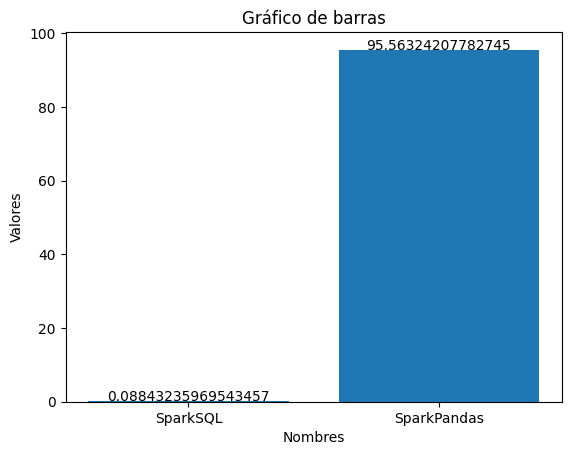

In [106]:
import matplotlib.pyplot as plt

# Datos de ejemplo
valores = [sparkSQLDuration, sparkDuration]
nombres = ['SparkSQL', 'SparkPandas']

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de barras
ax.bar(nombres, valores)

# Agregar etiquetas a cada barra
for i, v in enumerate(valores):
    ax.text(i, v + 0.1, str(v), ha='center')

# Personalizar el gráfico
ax.set_xlabel('Nombres')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de barras')

# Mostrar el gráfico
plt.show()